Enter the path of the image: /content/images (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


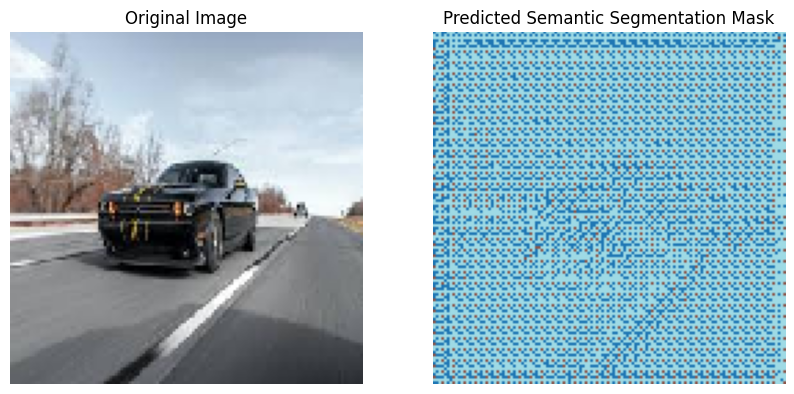

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def simple_cnn_segmentation(input_shape=(128, 128, 3), num_classes=3):  # Update num_classes as needed
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Bottleneck
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)

    # Output layer (softmax for multi-class classification)
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Load and preprocess user input image
image_path = input("Enter the path of the image: ")
img = image.load_img(image_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_input = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Create and load model
model = simple_cnn_segmentation()

# Predict the segmentation mask
predicted_mask = model.predict(img_input)

# Remove batch dimension and convert to the class with the highest probability for each pixel
predicted_mask = np.argmax(predicted_mask, axis=-1)  # Choose the class with the highest probability

# Display the original image and predicted mask
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_array)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show the predicted semantic mask (colorized for clarity)
axes[1].imshow(predicted_mask[0], cmap="tab20")  # 'tab20' is a nice colormap for multi-class masks
axes[1].set_title("Predicted Semantic Segmentation Mask")
axes[1].axis("off")

plt.show()
